In [2]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib 
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)


# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.3.0 (need at least 1.0)
Numpy version:        1.13.1 (need at least 1.7.1)
SciPy version:        0.19.0 (need at least 0.12.0)
Pandas version:       0.20.1 (need at least 0.11.0)
Mapltolib version:     2.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


## Introduction 
This notebook used data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). 
The goal of this problem set is to implement some of the basic econometric techniques to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village).

In [3]:
progresa = pd.read_csv("progresa_sample.csv") # load data

demo_var = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist',
       'dist_cap','hohedu', 'hohwag', 'welfare_index',
       'hohsex', 'hohage', 'age', 'grc97', 'sc97'] #demographic variables
mean = []
sd = []
for var in demo_var:
    mean.append(np.mean(progresa[var])) # mean of variable
    sd.append(np.std(progresa[var])) # standard deviation of variable
demo_df = pd.DataFrame({'mean':mean, 'sd':sd}, index=demo_var) # create a dataframe
print(demo_df)

                     mean          sd
sex              0.512211    0.499851
indig            0.298324    0.457522
dist_sec         2.418910    2.234094
sc               0.819818    0.384339
grc              3.963537    2.499046
fam_n            7.215715    2.352885
min_dist       103.447520   42.089168
dist_cap       147.674452   76.062641
hohedu           2.768104    2.656089
hohwag         586.985312  788.128563
welfare_index  690.346564  139.490225
hohsex           0.925185    0.263093
hohage          44.436717   11.620296
age             11.366460    3.167723
grc97            3.705372    2.572371
sc97             0.813922    0.389169


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? 

In [4]:
from scipy import stats
base_poor = progresa[(progresa['year']==97)& (progresa['poor']=='pobre')] # poor households in 1997
treat = base_poor[base_poor['progresa']=='basal'] # poor households in treatment group, 1997
control = base_poor[base_poor['progresa']=='0'] # poor households in control group, 197
treat_avg = []
control_avg = []
diff = []
p_val = []
for var in demo_var: #iterate over demographic variables
    treat_avg.append(np.mean(treat[var])) # average of variable in treatment group
    control_avg.append(np.mean(control[var])) # average of variable in control group
    diff.append(stats.ttest_ind(treat[var], control[var], nan_policy='omit')[0]) # ttest statistics between two groups
    p_val.append(stats.ttest_ind(treat[var], control[var], nan_policy='omit')[1]) # p-value

# create a dataframe 
demo_ttest_df = pd.DataFrame({'Variable':demo_var,'Avg Value(Treatment)': treat_avg, 'Avg Value(Control)': control_avg, 'Difference': diff, 'p-value': p_val}, columns=['Variable', 'Avg Value(Treatment)', 'Avg Value(Control)', 'Difference', 'p-value'])
print(demo_ttest_df)

         Variable  Avg Value(Treatment)  Avg Value(Control)  Difference  \
0             sex              0.519317            0.505052    2.506686   
1           indig              0.325986            0.332207   -1.161714   
2        dist_sec              2.453122            2.507662   -2.100433   
3              sc              0.822697            0.815186    1.668745   
4             grc              3.531599            3.543050   -0.400196   
5           fam_n              7.281327            7.302469   -0.794167   
6        min_dist            107.152915          103.237854    8.206584   
7        dist_cap            150.829074          153.769730   -3.339081   
8          hohedu              2.663139            2.590348    2.541229   
9          hohwag            544.339544          573.163558   -3.594588   
10  welfare_index            655.428377          659.579100   -3.188594   
11         hohsex              0.924656            0.922947    0.566312   
12         hohage        

There exist significant difference between control and treatment groups on some demographic characteristics such as sex, dist_sec, hohedu, etu, but the school enrollment level is not significantly different.
The true treatment effect will be confounded by the significant difference between control and treatment groups that exist prior to any treatment.
It implies that when we measure the impact of treatment, we need to minus the difference which already existed at baseline to get the net difference caused by the treatment. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

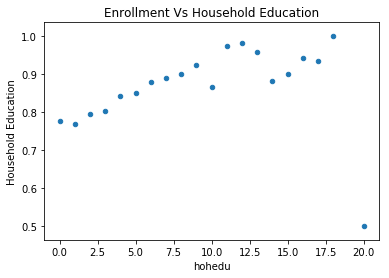

In [18]:
import matplotlib.pyplot as plt
# average enrollment of each level of household head education level
hoh_enroll = progresa.groupby('hohedu')['sc97'].agg('mean').reset_index()
plt.figure()
ax =hoh_enroll.plot.scatter(x='hohedu', y='sc97', 
                            title="Enrollment Vs Household Education") # plot education level vs enrollment rate
ax.set_ylabel("Household Education")
plt.show()

In general, the household head education level is in a positive relationship with the average enrollment rate, which means the higher level of education the household head has, the higher average enrollment rate their child would have achieved. However, there is one outlier which deviates from the trend. This outlier has high level of household head education (=20) but very low average enrollment rate. 

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

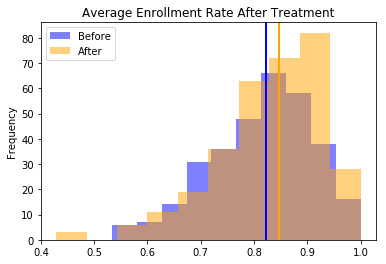

Ttest_indResult(statistic=-6.0692739292909827, pvalue=1.2976490728428597e-09)

In [43]:
# poor households in treatment group before treatment
treat_bef = progresa[(progresa['progresa']=='basal') & (progresa['poor']=='pobre')&(progresa['year']==97)]
# poor households in treatment group after treatment
treat_aft = progresa[(progresa['progresa']=='basal') & (progresa['poor']=='pobre')&(progresa['year']==98)]
# plot frequency of average enrollment of villages before treatment
plt.figure()
treat_bef.groupby('village')['sc'].agg('mean').plot.hist(color='blue', alpha=0.5, 
                                                         title='Average Enrollment Rate Before Treatment',
                                                        label='Before')
plt.axvline(x=np.mean(treat_bef['sc']), color='blue', linewidth=2)
# plot frequency of average enrollment of villages after treatment
treat_aft.groupby('village')['sc'].agg('mean').plot.hist(color='orange', alpha=0.5,
                                                         title='Average Enrollment Rate After Treatment',
                                                        label='After')
plt.axvline(x=np.mean(treat_aft['sc']), color='orange', linewidth=2)
plt.legend()
plt.show()
# ttest
stats.ttest_ind(treat_bef['sc'], treat_aft['sc'], nan_policy='omit')

* The histgram shows the distribution of enrollment rate shifted as a whole to the right side, so is the average enrollment rate, which means after treatment the enrollment rate increased. The result of t-test shows that the difference between control and treatment groups is statistically significant.
* It corresponds to pre program S1t and post program S1t.  

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [44]:
poor_98 = progresa[(progresa['year']==98)& (progresa['poor']=='pobre')] # poor households data collected in 1998
poor_98 = poor_98.dropna()
treat_avg = poor_98[poor_98['progresa']=='basal']['sc'] # enrollment in treatment group
contrl_avg = poor_98[poor_98['progresa']=='0']['sc']# enrollment in control group
print("%0.4f" %contrl_avg.mean())
print("%0.4f" %treat_avg.mean())
ttest = stats.ttest_ind(contrl_avg, treat_avg, nan_policy='omit')
print(ttest)
print("Difference between control and treatment :{:.4f}".format(treat_avg.mean()-contrl_avg.mean()))

0.8109
0.8493
Ttest_indResult(statistic=-8.1016503053003746, pvalue=5.656455605358843e-16)
Difference between control and treatment :0.0383


* The average enrollment rate in control group is 0.808 and in the treatment group is 0.846.
* This approach corresponds to the difference estimator Post-program D1 in Schultdz's paper.  
* The t-test shows this difference is significant, so we can conclude that given a random assignment to the control and treatment group, Progresa has significantly improved the enrollment rate among poor households.    

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [45]:
#import formula api as alias smf
import statsmodels.formula.api as smf
poor_98 = poor_98.dropna() # drop null 
poor_98['progresa_dummy'] = pd.Categorical(poor_98['progresa']).codes # convert progresa to categorical data
res = smf.ols(formula='sc ~ progresa_dummy', data=poor_98).fit() # fit linear regression
print(res.summary())
print('Simple Difference:{:.4f}'.format(res.params[1]))

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Thu, 02 Nov 2017   Prob (F-statistic):           5.66e-16
Time:                        15:11:26   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8109      0.004    217.

* The program has increased the average enrollment rate of poor by 0.0383.
* Compared with the result in 2.1, the intercept of the regression mode is the average enrollment level of control group (reference group), and the coefficient estimate of progresa is the enrollment difference between control and treatment groups.
* As the p-value of the coefficient estimate is less than 0.05, we can reject the null hypothesis that the program has no effect on school enrollment.
* The couterfactual assumption is without the treatment the enrollment rate would still change as it did.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [46]:
multi_res = smf.ols(formula='sc ~ progresa_dummy + hohedu +  dist_sec + fam_n + indig + sex', data=poor_98).fit() # fit multiple regression\
print(multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     99.02
Date:                Thu, 02 Nov 2017   Prob (F-statistic):          1.14e-123
Time:                        15:11:40   Log-Likelihood:                -10910.
No. Observations:               26155   AIC:                         2.183e+04
Df Residuals:                   26148   BIC:                         2.189e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7846      0.010     81.

* The coefficient estimate of progresa was slightly smaller in multiple regression than in the simple regression model.
* The standard error in the multiple regression model remained the same as in the simple regression model.
* The difference exists because in the simple regression model, the coefficient represents the average effect of Progresa program, igoring other predictors while in the multiple regression model, the coefficient represents the average effect of Progresa program while holding other predictors fixed.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [47]:
# poor in 97
poor_97 = progresa[(progresa['year']==97) & (progresa['poor']=='pobre')] 
# poor in 98
poor_98 = progresa[(progresa['year']==98) & (progresa['poor']=='pobre')] 
# difference between 97 and 98 in control group
diff_contrl = poor_98[poor_98['progresa']=='0']['sc'].mean()- poor_97[poor_97['progresa']=='0']['sc'].mean()
# difference between 97 and 98 in treatment group
diff_treat = poor_98[poor_98['progresa']=='basal']['sc'].mean()- poor_97[poor_97['progresa']=='basal']['sc'].mean()
# diff in diff
did = diff_treat-diff_contrl
print('Difference-in-Difference:{:0.4f}'.format(did))

Difference-in-Difference:0.0313


* The difference-in-difference value is slightly smaller than the simple difference value because the control group and treatment group didn't start out at same point in 1997 (baseline), but this initial difference is ignored in the simple difference. Diff-in-diff minus this initial difference from the total difference between control and treatment group in 1998, so the value is smaller than the simple difference.  
* The counterfactual assumption is if neither group has received treatment, the much of difference between treatment and control would still be the same as it is.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [48]:
poor_dat = progresa[progresa['poor']=='pobre'] # poor families
poor_dat = poor_dat.dropna() # drop na
poor_dat['year_dummy']=pd.Categorical(poor_dat['year']).codes #categorize year
poor_dat['progresa_dummy'] = pd.Categorical(poor_dat['progresa']).codes # categorize progresa
#print(poor_dat.head(10))
#linear regression fit
diff_res = smf.ols(formula='sc ~ year_dummy * progresa_dummy +  hohedu +  dist_sec + fam_n + indig + sex', data=poor_dat).fit()
print(diff_res.summary()) 
print('Estimate impact of Progresa:{:.4f}'.format(diff_res.params[3]))


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     146.9
Date:                Thu, 02 Nov 2017   Prob (F-statistic):          6.91e-246
Time:                        15:11:55   Log-Likelihood:                -24874.
No. Observations:               56893   AIC:                         4.977e+04
Df Residuals:                   56884   BIC:                         4.985e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

* The estimate impact of Progresa is 0.0308. It means the difference of the average enrollment between the control and treatment group in 1998 minus the difference between the control and treatment group in 1997 is 0.0308. In other words, assuming there is no difference between control and treatment group in 1997, the program will increase the enrollment rate by 0.0308.  
* Compared with the simple difference estimate, the coefficient is smaller.
* The difference estimate is slightly smaller than in 2.4. The difference is caused by the introduction of other predictors.
* The counterfactual assumption is if neither group has received treatment, the much of difference between treatment and control would still be the same as it is.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [49]:
dat_98 = progresa[progresa['year']==98] # data in 98
dat_98 = dat_98.dropna() # drop na
dat_98['poor_dummy'] = pd.Categorical(dat_98['poor']).codes # categorize poor
dat_98['progresa_dummy'] = pd.Categorical(dat_98['progresa']).codes # categorize progresa
diff_res2 = smf.ols(formula='sc ~ poor_dummy * progresa_dummy', data=dat_98).fit() # linear regression fit
print(diff_res2.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     35.16
Date:                Thu, 02 Nov 2017   Prob (F-statistic):           1.13e-22
Time:                        15:12:00   Log-Likelihood:                -13466.
No. Observations:               30665   AIC:                         2.694e+04
Df Residuals:                   30661   BIC:                         2.697e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

* We can introduce the interaction term between poor and progresa to measure the program effect on reducing the enrollment difference between poor and non-poor household. The coefficient of the progresa and poor interaction term is the program impact, in this case it is 0.0089.
* The counterfactual assumption is the without the program the enrollment difference between poor and non-poor households would still be decreased.
* Compared with the previous estimate, the program's impact in this model is smaller and it is not statistically significant.
* The estimate is different because these two models (version 1 and version 2) explored different aspects of the program impact.Version 1 measures the net effect of the program on the treatment group, while version 2 measures how the program decreased difference of enrollment between poor and non poor households.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [14]:
nonpoor_dat = progresa[progresa['poor']=='no pobre'] # no poor families
nonpoor_dat = nonpoor_dat.dropna() # drop na
nonpoor_dat['year_dummy']=pd.Categorical(nonpoor_dat['year']).codes # categorize year
nonpoor_dat['progresa_dummy'] = pd.Categorical(nonpoor_dat['progresa']).codes # categorize progresa
diff_res = smf.ols(formula='sc ~ year_dummy * progresa_dummy', data=nonpoor_dat).fit() # linear regression fit
print(diff_res.summary()) 
print('Estimate impact of Progresa:{:.3f}'.format(diff_res.params[3]))

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.993
Date:                Wed, 25 Jan 2017   Prob (F-statistic):           0.000447
Time:                        11:52:22   Log-Likelihood:                -5317.6
No. Observations:               10229   AIC:                         1.064e+04
Df Residuals:                   10225   BIC:                         1.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

* The PROGRESA may have impacted non-poor households when the limited schooling resources are shared between poor and non-poor families. More poor households getting enrolled to school would lead to less non poor households being enrolled.  
* The impacts of PROGRESA on the non-poor is -0.002.
* It is assumed that non-poor households are eligible to receive the treatment.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?